# Generate the data

In [1]:
import torch
from torch import Tensor
import math

In [31]:
def generate_disc_data(nb_samples, one_hot_labels = False, normalize = False):
    
    train_input = Tensor(nb_samples,2).uniform_(-1,1)
    test_input = Tensor(nb_samples,2).uniform_(-1,1)
    
    train_target = (((1/(2*math.pi) - (train_input.pow(2).sum(1))).sign() + 1) / 2).long()
    test_target = (((1/(2*math.pi) - (test_input.pow(2).sum(1))).sign() + 1) / 2).long()
    
    if one_hot_labels:
        train_target = convert_to_one_hot_labels(train_input, train_target)
        test_target = convert_to_one_hot_labels(test_input, test_target)

    if normalize:
        mu, std = train_input.mean(), train_input.std()
        train_input.sub_(mu).div_(std)
        test_input.sub_(mu).div_(std)
    
    return train_input, train_target, test_input, test_target
        
        
def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), 2)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [62]:
nb_samples = 10000
train_input, train_target, test_input, test_target = generate_disc_data(nb_samples, one_hot_labels = True, normalize = False)




# Plot the data

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_disc_data(input, target, one_hot_labels = False):
    if one_hot_labels :
        labels = target[:,-1]
    else :
        labels = target
    
    plt.figure(figsize=(8,8))
    plt.scatter(input[:,0] , input[:,1] , s= 1, c = labels)
    plt.show()

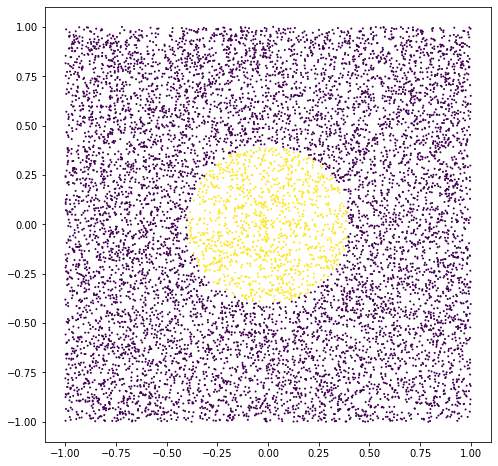

In [51]:
plot_disc_data(train_input, train_target, one_hot_labels = True)

# Activation functions class

In [52]:
from Module import *

In [53]:
class ReLu(Module):
    def __init__(self):
        self.input = None
        
    def forward(self, input):
        self.input = input.clone()
        input[input < 0] = 0
        return input
        
    def backward(self, gradwrtoutput):
        return gradwrtoutput.mul(self.input > 0)

In [54]:
class tanh(Module):
    def __init__(self):
        self.input = None
        
    def forward(self, input):
        self.input = input.clone()
        return torch.tanh(input)
        
    def backward(self, gradwrtoutput):
        return gradwrtoutput.mul(1 - self.input.tanh.pow(2))

In [55]:
class MSE(Module):
    def __init__(self):
        raise NotImplementedError
    def forward(self, y_true , y_pred):
        return (y_pred - y_true).pow(2).sum() / y_true.shape[0]
    def backward(self, y_true, y_pred):
        return 2*(y_pred - y_true) / y_true.shape[0]

In [ ]:
def compute_nb_error(model,input,target):
    output = model.forward(input)
    pred_classes = torch.max(output,1)[1]
    target_classes = target[:,1]
    nb_error = (pred_classes != target_classes).sum()
    return nb_error / target.shape[0]
    

In [69]:
torch.max(train_target,1)[1]

tensor([0, 0, 1,  ..., 0, 0, 0])

In [72]:
train_target.shape[0]

10000